In [2]:
import pandas as pd 
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
import seaborn as sns 


In [3]:
#Timeframe and Ticker
end = dt.datetime.now()
#Considering Historical data of last 6 years 
start = dt.date(end.year - 6,end.month, end.day) 
ticker = ["GOOG"] #Chosen Stock

In [4]:
stock_prices = reader.get_data_yahoo(ticker, start, end)['Adj Close']
stock_prices.head()

Symbols,GOOG
Date,
2015-12-16,758.090027
2015-12-17,749.429993
2015-12-18,739.309998
2015-12-21,747.770020
2015-12-22,750.000000


In [6]:
#Lets use monthly frequency 
stock_prices = stock_prices.resample('1M').last()
stock_prices.head()

Symbols,GOOG
Date,
2015-12-31,758.880005
2016-01-31,742.950012
2016-02-29,697.770020
2016-03-31,744.950012
2016-04-30,693.010010


In [7]:
#monthly returns 
stock_returns = stock_prices.pct_change()
stock_returns = stock_returns.dropna()
stock_returns.head()

Symbols,GOOG
Date,
2016-01-31,-0.020991
2016-02-29,-0.060812
2016-03-31,0.067615
2016-04-30,-0.069723
2016-05-31,0.061630


In [1]:
#Fama French 3 Factor Model
#First is the excess return of the market portfolio (Mkt-rf)
# which is Market return minus risk free rate per month
#Second is the SMB which is the return on a portfolio of small firms minus the return on large firms
# third is the return on a portfolio of value stocks minus that of the growth stocks
ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))
ff3_monthly.rename(columns={'date_ff_factors':'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)
ff3_monthly

NameError: name 'pd' is not defined

In [14]:
#Using Historical data we checked if these factors are associated with a premium
# we see all are positive 
market_premium=ff3_monthly['Mkt-RF'].mean() # which means market return is .69% higher than risk free rate
size_premium=ff3_monthly['SMB'].mean() # Small firms have .20% higher monthly returns than large companies
value_premium=ff3_monthly['HML'].mean() # Value stocks have .33% higher monthly returns than growth stocks 
print(market_premium, size_premium, value_premium)

0.006931905594405599 0.0020048076923076938 0.003346678321678321


In [ ]:
#since Tesla is a growth stock, when using Fama French 3 factor model should give us lower returns than when we use CAPM 
# we check if this is true or not from our analysis


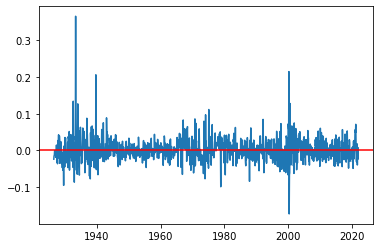

In [15]:
#When we say Small Cap firms have higher return or Value firms have higher returns, It is based on average returns!
plt.plot(ff3_monthly['SMB'])
plt.axhline(0, color='red')
#return on small companies compared to large compaies is sometimes positive & negative, on average it is positive 

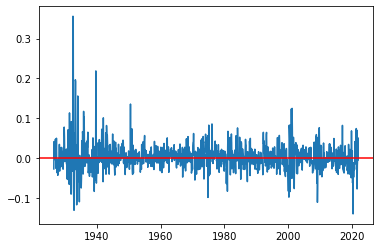

In [16]:
plt.plot(ff3_monthly['HML'])
plt.axhline(0, color='red')
#similiarlly investing in value stocks compared to growth stock has higher return on average. atleast at intial data


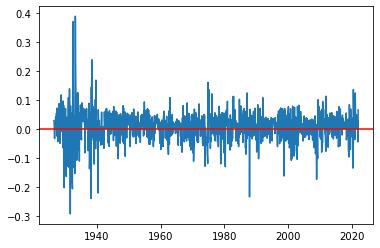

In [17]:
plt.plot(ff3_monthly['Mkt-RF'])
plt.axhline(0, color='red')
#since the monthly average of Mkt-RF is .7%
# then annual excess return is .7*12= 8.4%
# this is quite large, Which tells why indiduals would want to enter stock market
# since we used AVG returns we can assume that dont see huge variations
# we can massive negative returns in the chart. which would imply that if we a shorter time frame we can have negative returns on the factors

In [21]:
#Merging similiar dates
data = ff3_monthly.merge(stock_returns, on = 'Date')
data.head()

,Mkt-RF,SMB,HML,RF,GOOG
Date,,,,,
2016-01-31,-0.0577,-0.0339,0.0207,0.0001,-0.020991
2016-02-29,-0.0008,0.0081,-0.0057,0.0002,-0.060812
2016-03-31,0.0696,0.0075,0.0110,0.0002,0.067615
2016-04-30,0.0092,0.0067,0.0321,0.0001,-0.069723
2016-05-31,0.0178,-0.0019,-0.0165,0.0001,0.061630


In [24]:
market_premium1=data['Mkt-RF'].mean()
Size_premium1=data['SMB'].mean()
Value1=data['HML'].mean()
print(market_premium1, Size_premium1, Value1)

0.013934285714285718 0.0010828571428571428 -0.003778571428571429


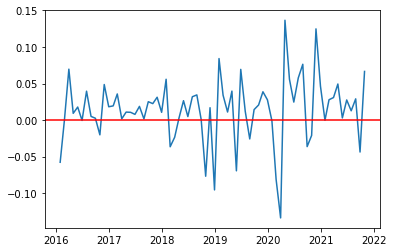

In [25]:
plt.plot(data['Mkt-RF'])
plt.axhline(0, color='red')

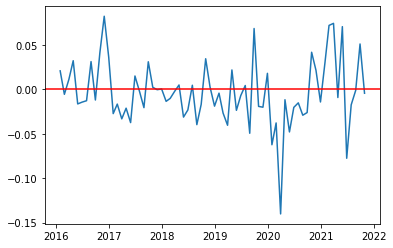

In [26]:
plt.plot(data['HML'])
plt.axhline(0, color='red')

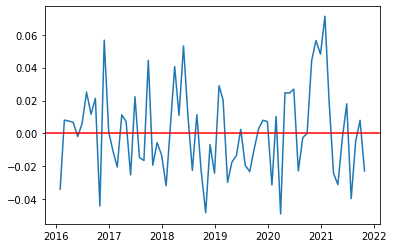

In [28]:
plt.plot(data['SMB'])
plt.axhline(0, color='red')

In [32]:
# considering 5 years of data for our model
data = data.tail(60)
data.shape

(60, 5)

In [33]:
#Googles excess return
GOOG_excess_ret = data['GOOG'] - data['RF']
data['GOOG-RF'] = GOOG_excess_ret
data.head()

,Mkt-RF,SMB,HML,RF,GOOG,GOOG-RF
Date,,,,,,
2016-11-30,0.0486,0.0567,0.0821,0.0001,-0.033778,-0.033878
2016-12-31,0.0182,0.0009,0.0360,0.0003,0.018178,0.017878
2017-01-31,0.0194,-0.0113,-0.0274,0.0004,0.032352,0.031952
2017-02-28,0.0357,-0.0204,-0.0167,0.0004,0.033158,0.032758
2017-03-31,0.0017,0.0113,-0.0333,0.0003,0.007714,0.007414


In [34]:
#Need Linear Model Built By Teammates here as suggested by Prof. Dan
x = data[['Mkt-RF', 'SMB', 'HML']]
y = data['GOOG-RF']
x1 = sm.add_constant(x) # constant 
model = sm.OLS(y,x1)

results = model.fit()
results.summary()
# Our Beta is 1.0647 and is highly significant since p Values is below 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GOOG-RF   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     21.14
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           2.76e-09
Time:                        23:23:40   Log-Likelihood:                 102.56
No. Observations:                  60   AIC:                            -197.1
Df Residuals:                      56   BIC:                            -188.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.006      1.225      0.226      -0.005       0.020
Mkt-RF         1.0647      0.135      7.895      0.000       0.795       1.335
SMB           -0.4470      0.231     -1.931      0.059      -0.911       0.017
HML           -0.0324      0.162     -0.200      0.843      -0.357       0.292
==============================================================================
Omnibus:                        7.280   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.475
Skew:                           0.679   Prob(JB):                       0.0393
Kurtosis:                       3.864   Cond. No.                         40.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
results.params
# as the beta is very close one, it would mean investing in the stocks has a low level of systematic risk
# SMB & HML are negative which would mean that when we compute expected return using all the three factors we would get a lower return 

const     0.007719
Mkt-RF    1.064660
SMB      -0.446994
HML      -0.032358
dtype: float64

In [38]:
#Need to edit to match above results!!
class Linear_regression:

    def __init__(self, x, y, m, c, epochs, L):
        self.x = x
        self.y = y
        self.m = m
        self.c = c
        self.epochs = epochs
        self.L = L
        
        
        
    def gradient_descent(self) :
        #calculate predicted Y and update m and c values based on the given input
        for j in range(self.epochs):
            Y_pred = np.matmul(self.x, self.m) + self.c
            Y_T = np.transpose(self.y)
            X_T = np.transpose(self.x)
            Y_dif = Y_T - Y_pred

            D_m = - np.matmul(X_T, Y_dif)
            D_c = -1 * Y_dif

            self.m = self.m - (self.L * D_m)
            self.c = self.c - (self.L * D_c)

        return (self.m, self.c)
    
    
    def predict(self, x_new):
        y_pred = []
        Y_pred = np.matmul(self.x*self.m) + self.c
        for i in x_new:
            y_pred.append(i*self.m + self.c)
        return y_pred


